In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import sklearn as sk

In [30]:
df = pd.read_csv("Datasets/diabetes_binary_health_indicators_BRFSS2015.csv")
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [31]:
def draw_hist(dataframe):
    for column in dataframe.columns:
        print(column)
        plt.figure()
        dataframe[column].hist()

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f"Distribution of {column}")
        plt.show()

In [32]:
print(df.info(verbose=True,memory_usage=False))
print("Null values =",df.isnull().values.any())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [33]:
print(df.describe())

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

In [34]:
print(df.head())
print(df.tail())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

[35346, 218334]


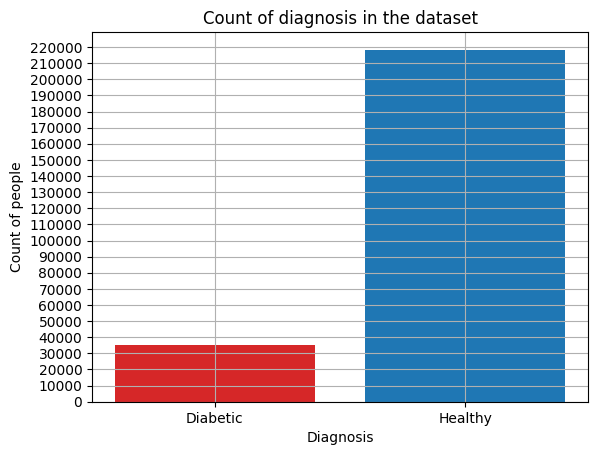

In [35]:

outcomes = ("Diabetic","Healthy")
outcome_counts = [len(df.loc[df['Diabetes_binary']==1]), len(df.loc[df['Diabetes_binary']==0])]
print(outcome_counts)
# display as a graph

colours=['tab:red', 'tab:blue']

fig, ax = plt.subplots()

ax.bar(outcomes, outcome_counts, color=colours)

ax.set_ylabel("Count of people")
ax.set_xlabel("Diagnosis")
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10000)) # Y axis increments at 50 
plt.title('Count of diagnosis in the dataset')
plt.grid()
plt.show()

There are no invlaid 0 val columns 

Correlation Matrix 

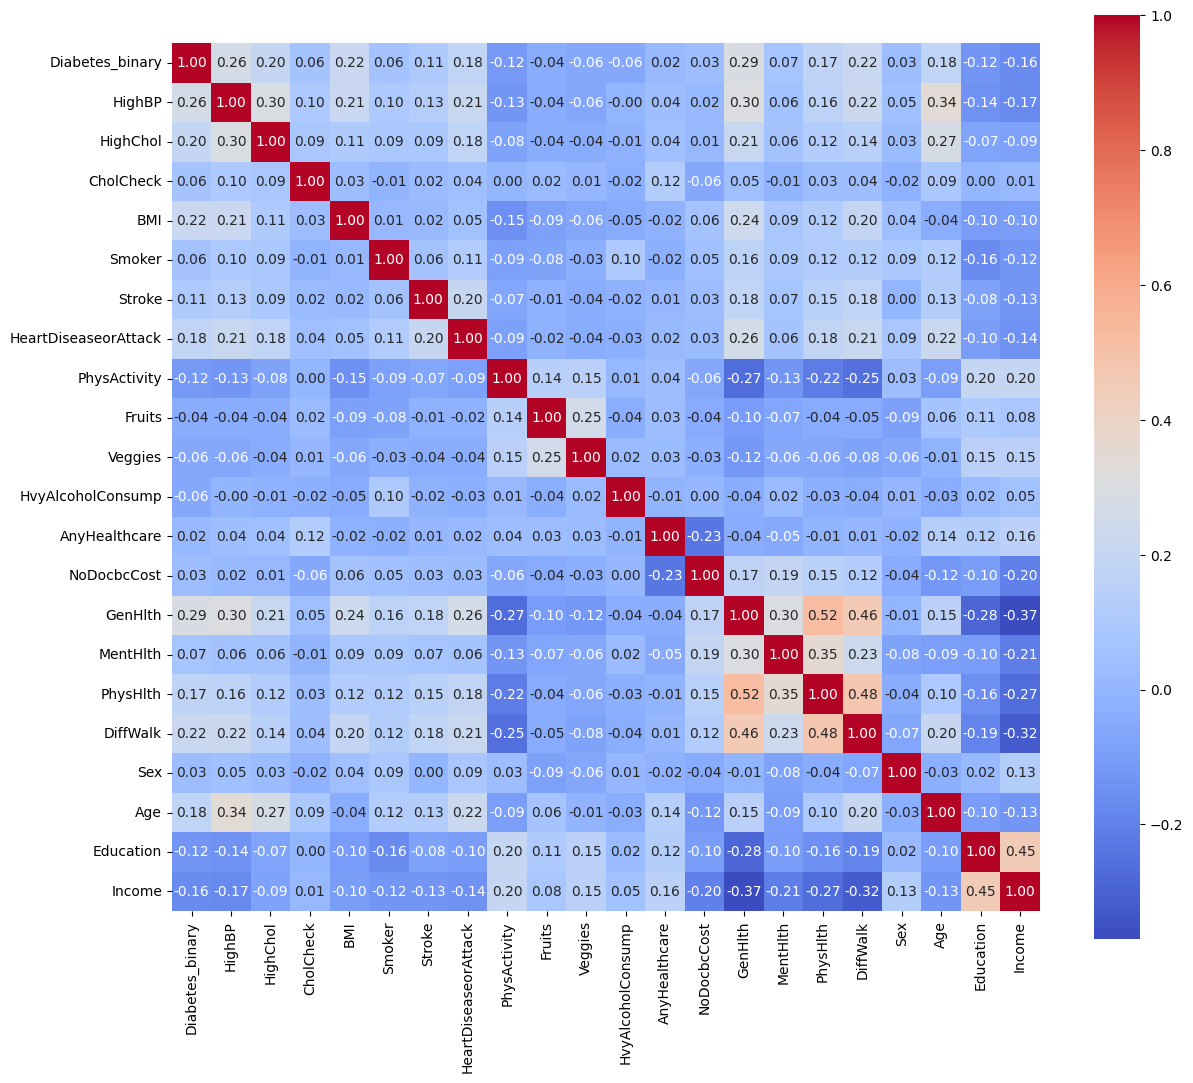

In [36]:
matrix = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(matrix,cmap='coolwarm',annot=True, square=True, fmt=".2f")
plt.show()

Histogram displaying distribution of features values 

Diabetes_binary


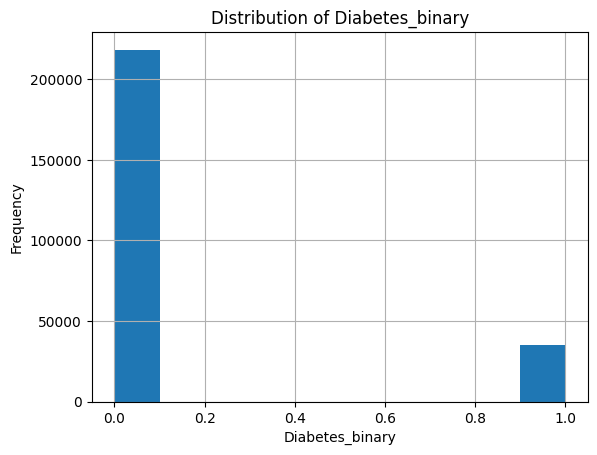

HighBP


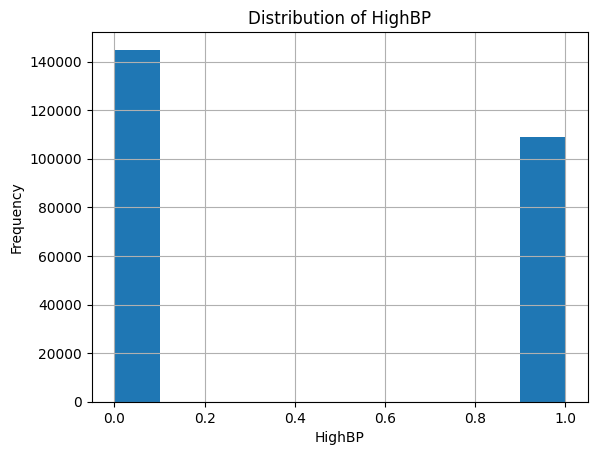

HighChol


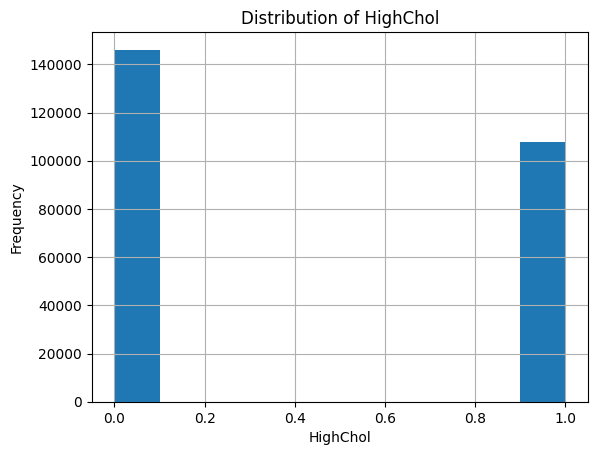

CholCheck


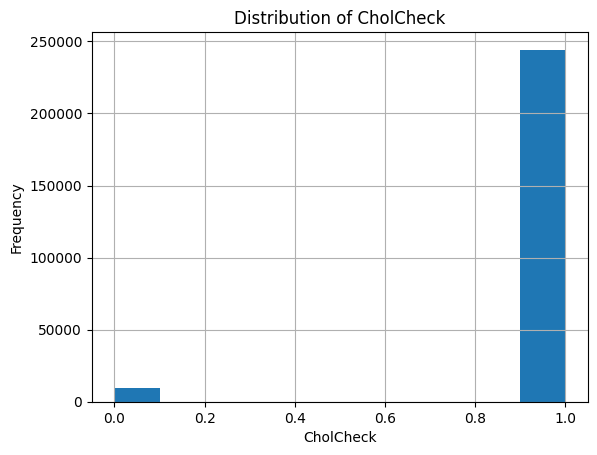

BMI


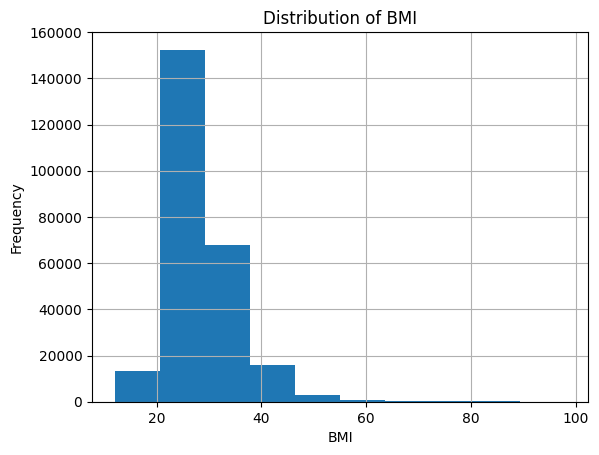

Smoker


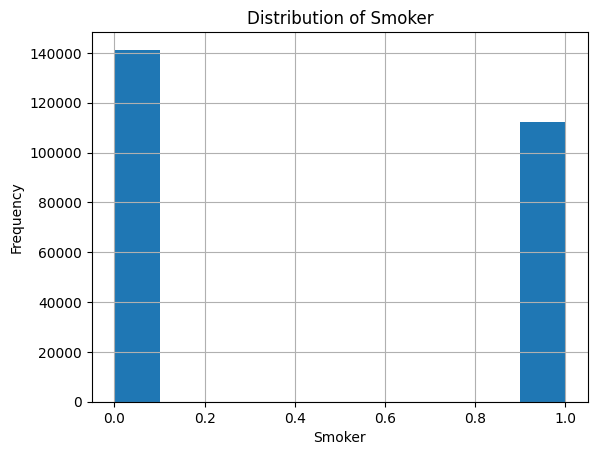

Stroke


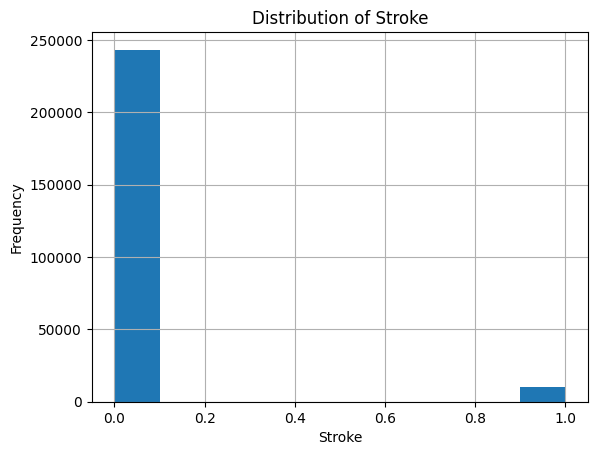

HeartDiseaseorAttack


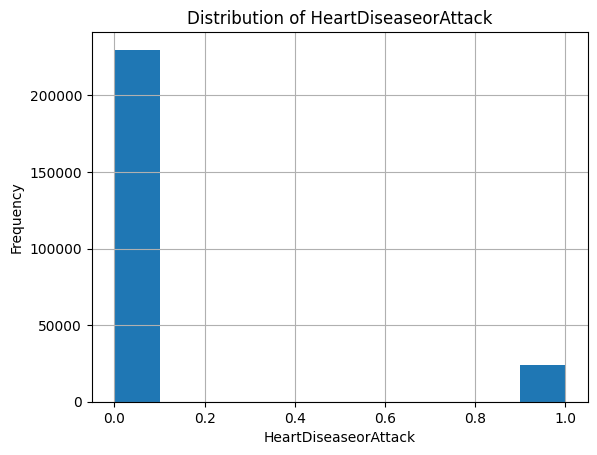

PhysActivity


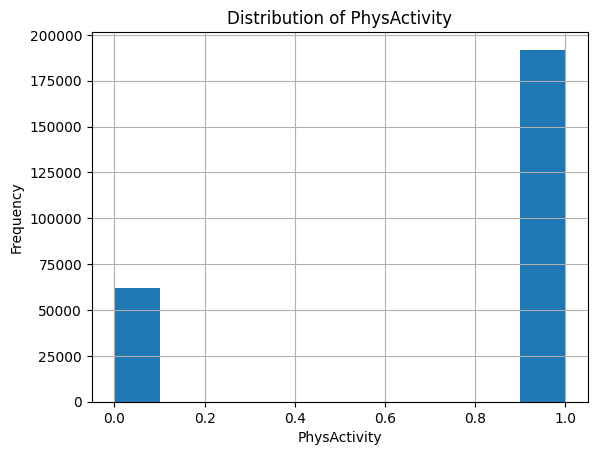

Fruits


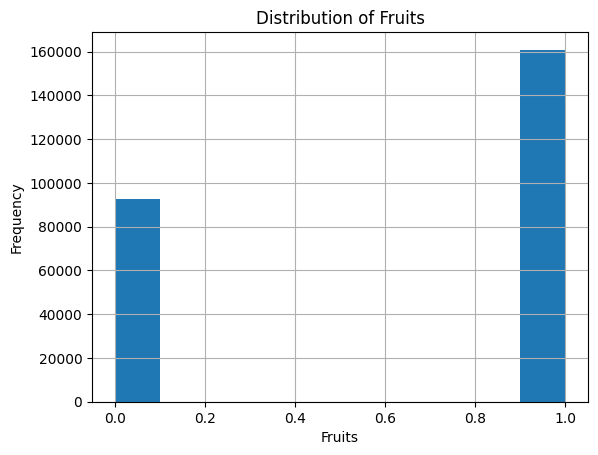

Veggies


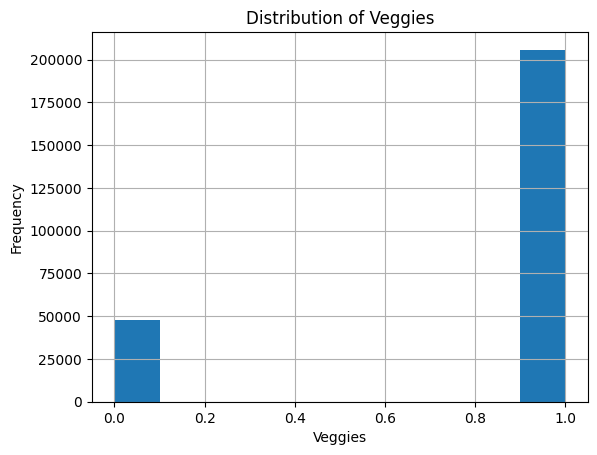

HvyAlcoholConsump


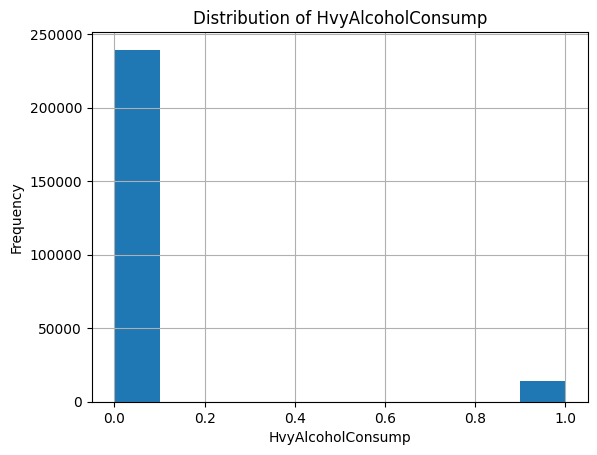

AnyHealthcare


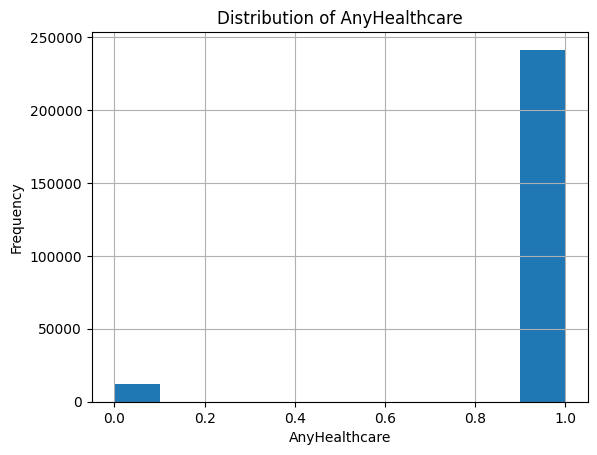

NoDocbcCost


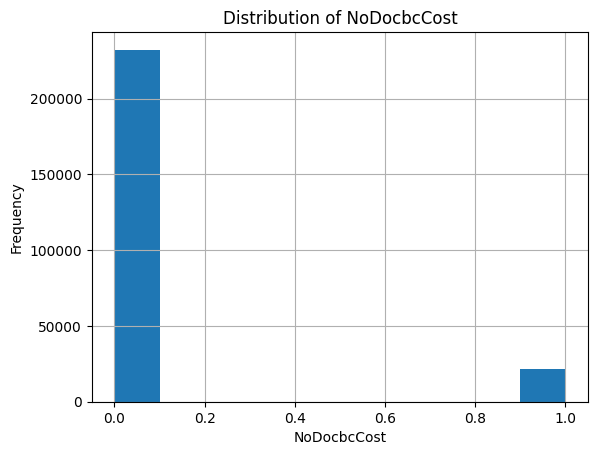

GenHlth


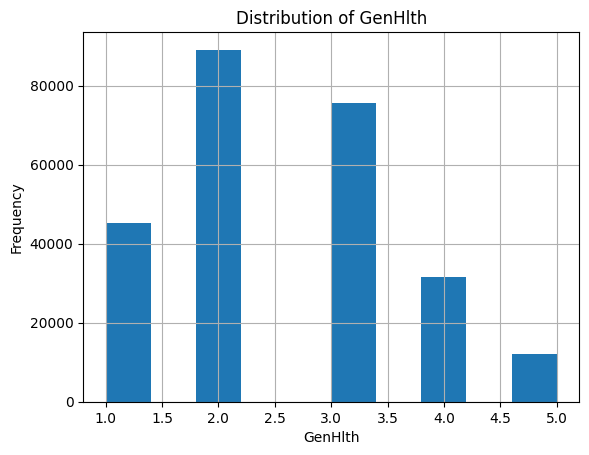

MentHlth


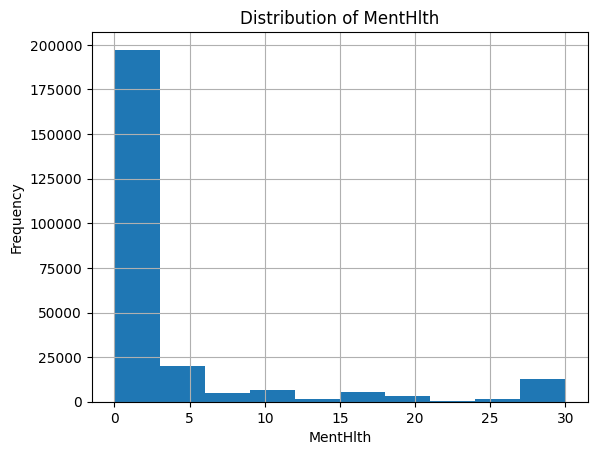

PhysHlth


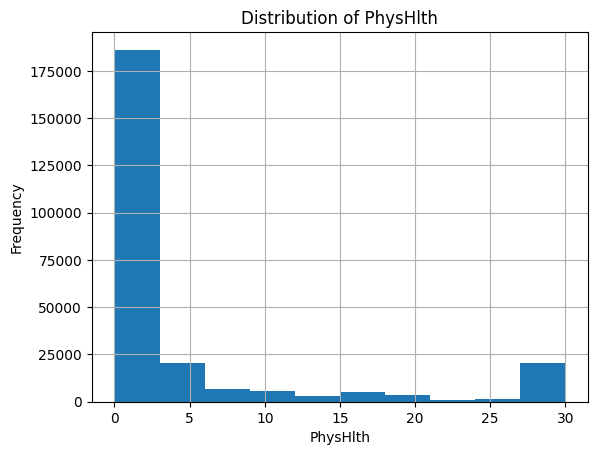

DiffWalk


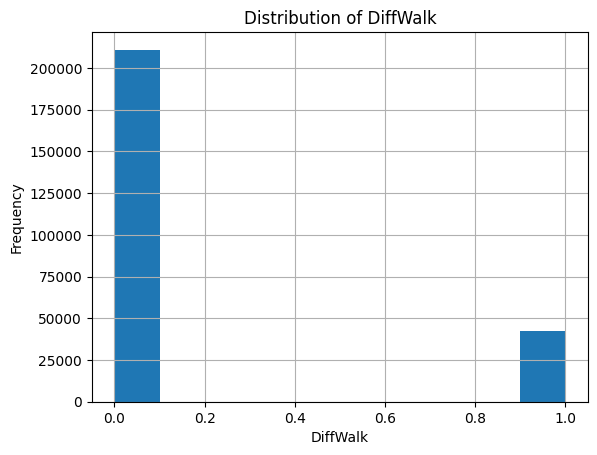

Sex


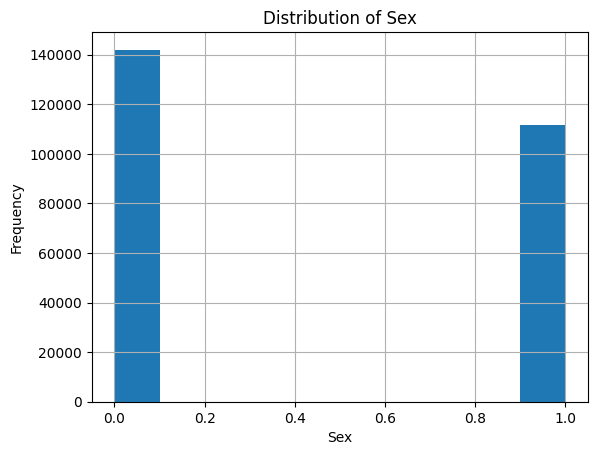

Age


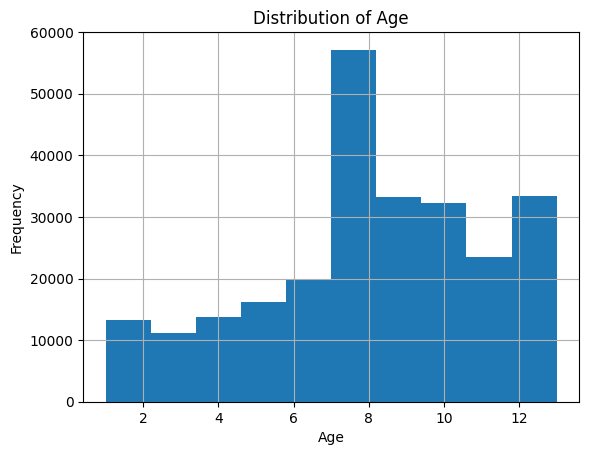

Education


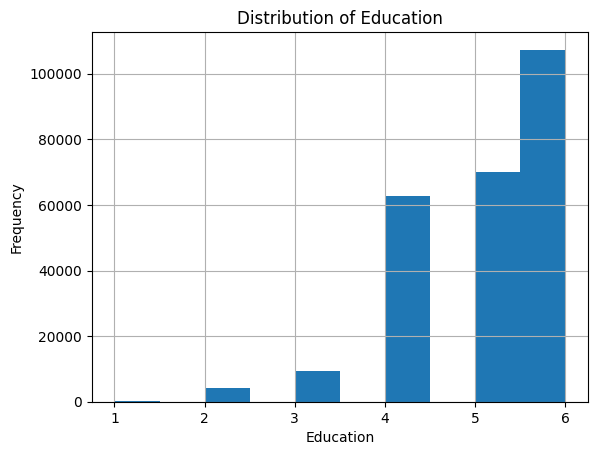

Income


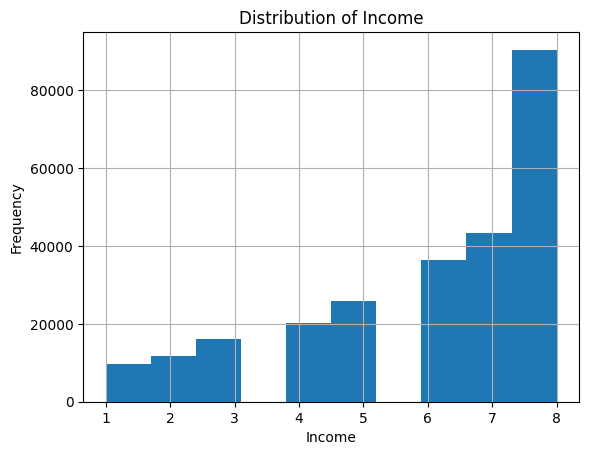

In [37]:
draw_hist(df)

Comparing the distrubition of the 2 columns that contain invalid 0's
- Could they be valid in the context of the data  



In [38]:
df_copy = df.copy(deep=True)

<Figure size 1200x600 with 0 Axes>

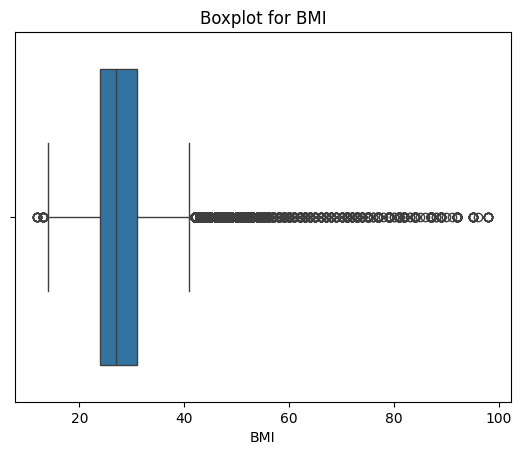

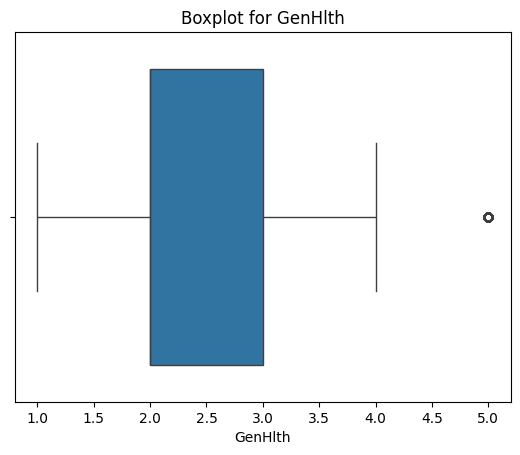

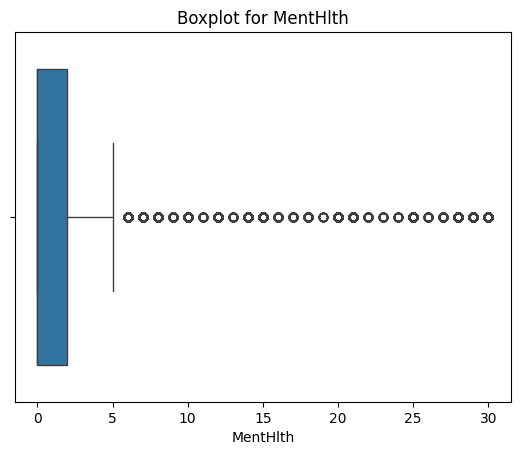

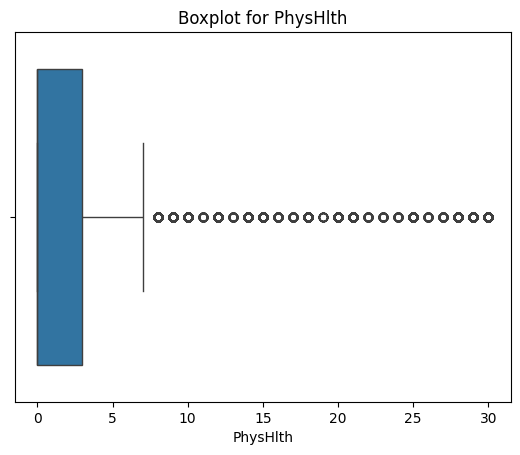

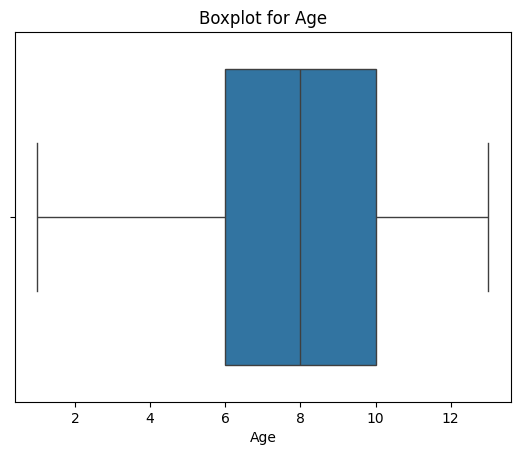

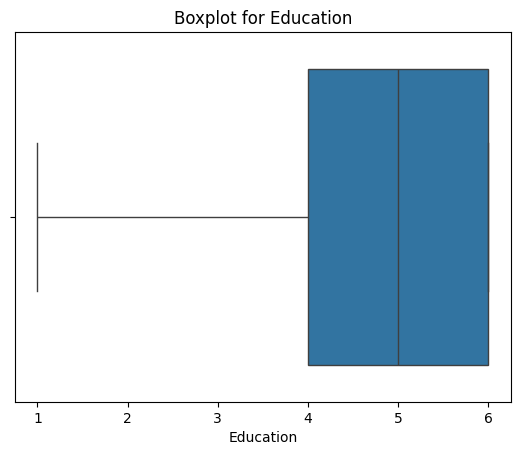

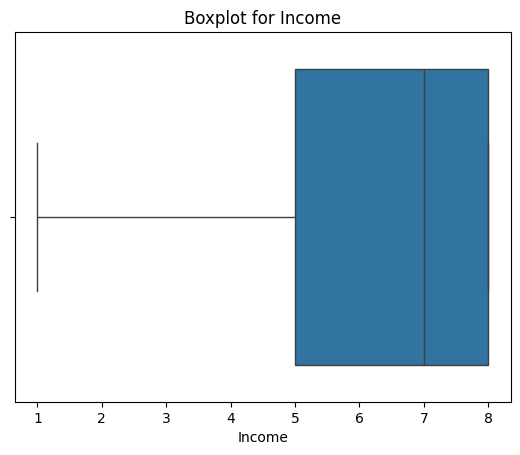

In [39]:
df.columns

outlier_columns=['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income' ]

def draw_box(dataframe,cols):
    plt.figure(figsize=(12,6))
    for column in cols:
        plt.figure()
        sns.boxplot(dataframe,x=column)
        plt.title(f"Boxplot for {column}")
        plt.show()
# had to be reworked only display specfic vals 



draw_box(df_copy,outlier_columns)



Spliting the data into feature and target (Orginal dataset)

In [40]:
df_smote = df.copy(deep= True)

In [46]:
x = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

x_s = df.drop('Diabetes_binary', axis=1)
y_s = df['Diabetes_binary']

x_s2 = x_s

y_s2 = y_s 

List of models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC  # due to the standard svm taking 500mins + i will use the linear SVC which is more optimised 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogisticRegression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5), # 5 is the default 
    "DT": DecisionTreeClassifier(),
    "SVM": LinearSVC(),
    "GNB": GaussianNB(),
    "RF": RandomForestClassifier()
    # "XGB" 
    
}

Preparing K fold algorithm

In [43]:
#Intially split the data in 10 folds as this is a commonly used value
kf = KFold(n_splits=10,shuffle=True)

Orginal Dataset

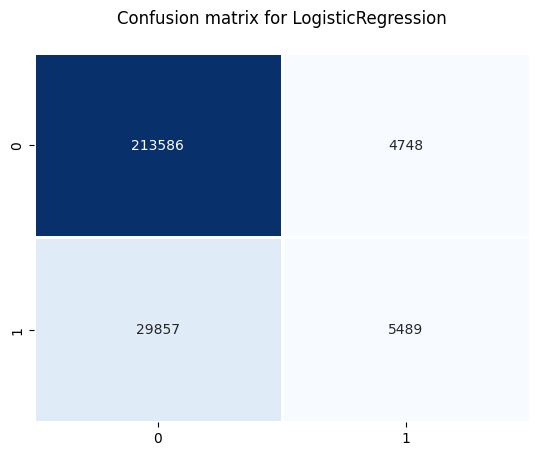

####################################
Classfication report for LogisticRegression
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    218334
         1.0       0.54      0.16      0.24     35346

    accuracy                           0.86    253680
   macro avg       0.71      0.57      0.58    253680
weighted avg       0.83      0.86      0.83    253680



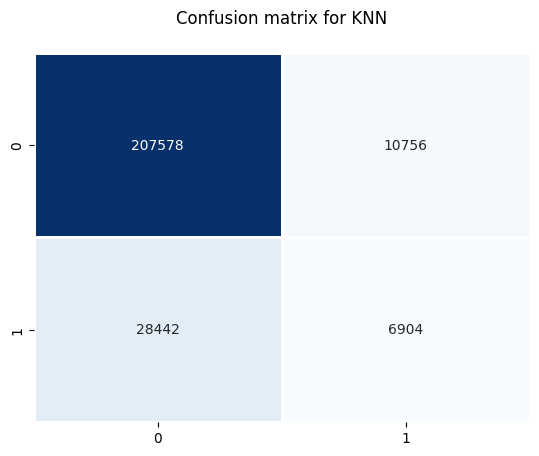

####################################
Classfication report for KNN
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91    218334
         1.0       0.39      0.20      0.26     35346

    accuracy                           0.85    253680
   macro avg       0.64      0.57      0.59    253680
weighted avg       0.81      0.85      0.82    253680



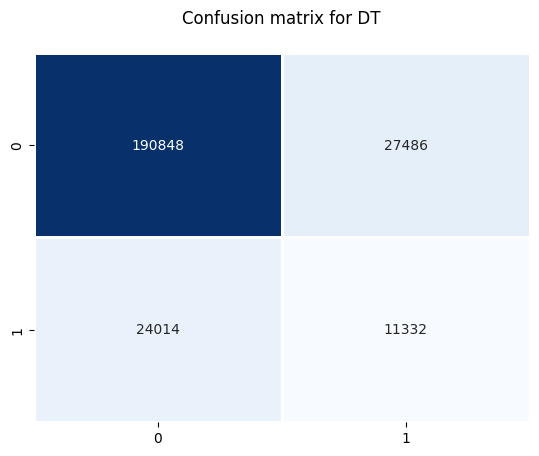

####################################
Classfication report for DT
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88    218334
         1.0       0.29      0.32      0.31     35346

    accuracy                           0.80    253680
   macro avg       0.59      0.60      0.59    253680
weighted avg       0.81      0.80      0.80    253680



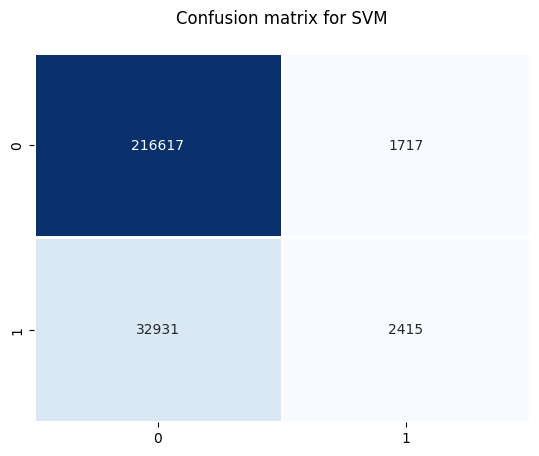

####################################
Classfication report for SVM
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93    218334
         1.0       0.58      0.07      0.12     35346

    accuracy                           0.86    253680
   macro avg       0.73      0.53      0.52    253680
weighted avg       0.83      0.86      0.81    253680



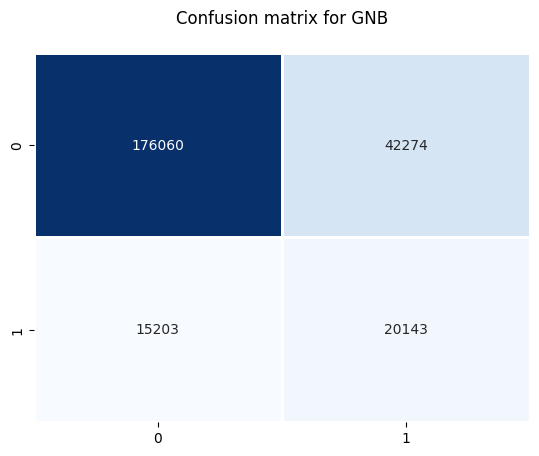

####################################
Classfication report for GNB
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86    218334
         1.0       0.32      0.57      0.41     35346

    accuracy                           0.77    253680
   macro avg       0.62      0.69      0.64    253680
weighted avg       0.84      0.77      0.80    253680



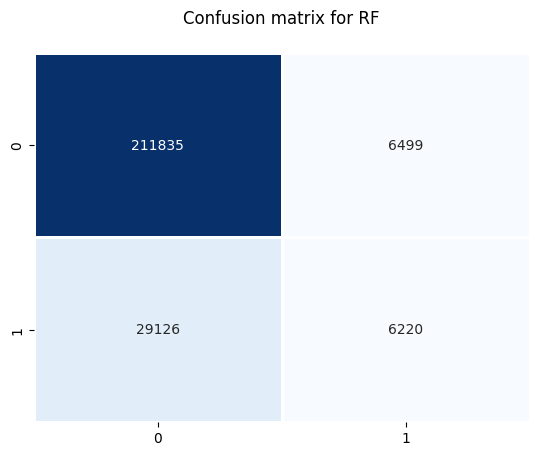

####################################
Classfication report for RF
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92    218334
         1.0       0.49      0.18      0.26     35346

    accuracy                           0.86    253680
   macro avg       0.68      0.57      0.59    253680
weighted avg       0.82      0.86      0.83    253680



In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



for name, m in models.items():
    pipeline = Pipeline([('scaler', MinMaxScaler())
                         ,('classifier', m)
                         
                         ])

    y_pred = cross_val_predict(pipeline,x,y,cv=kf,)

    confusionM = confusion_matrix(y,y_pred)
    sns.heatmap(confusionM, annot= True, cmap= 'Blues', fmt= "d",cbar= False, linewidths= 1)
    plt.title (f"Confusion matrix for {name}\n")
    plt.show()


    print("####################################")
    print(f"Classfication report for {name}")
    print(classification_report(y,y_pred))
    # add variance 



Smote Applied before K fold 

C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


436668


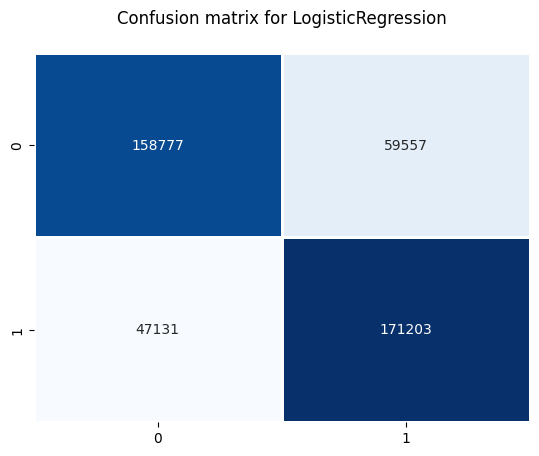

Classfication report for LogisticRegression
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75    218334
         1.0       0.74      0.78      0.76    218334

    accuracy                           0.76    436668
   macro avg       0.76      0.76      0.76    436668
weighted avg       0.76      0.76      0.76    436668

####################################
436668


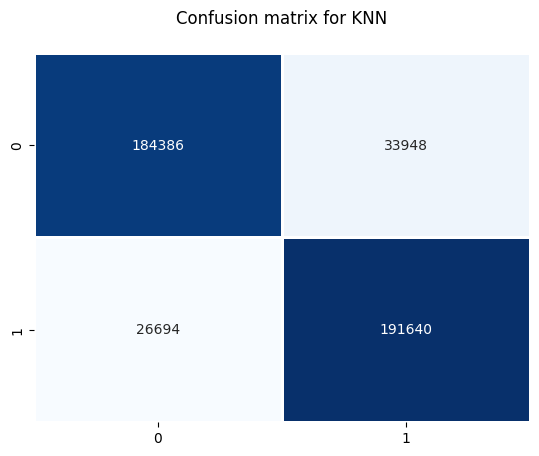

Classfication report for KNN
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86    218334
         1.0       0.85      0.88      0.86    218334

    accuracy                           0.86    436668
   macro avg       0.86      0.86      0.86    436668
weighted avg       0.86      0.86      0.86    436668

####################################
436668


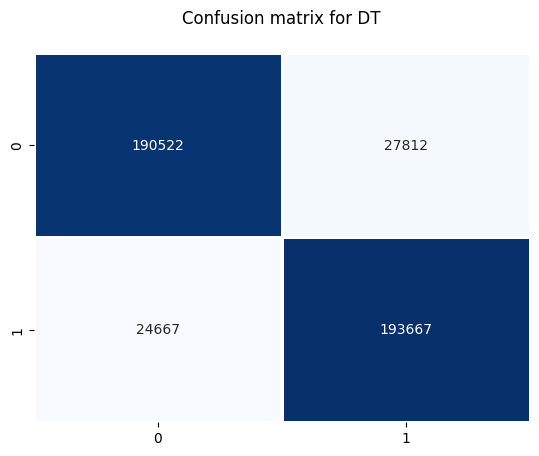

Classfication report for DT
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88    218334
         1.0       0.87      0.89      0.88    218334

    accuracy                           0.88    436668
   macro avg       0.88      0.88      0.88    436668
weighted avg       0.88      0.88      0.88    436668

####################################
436668


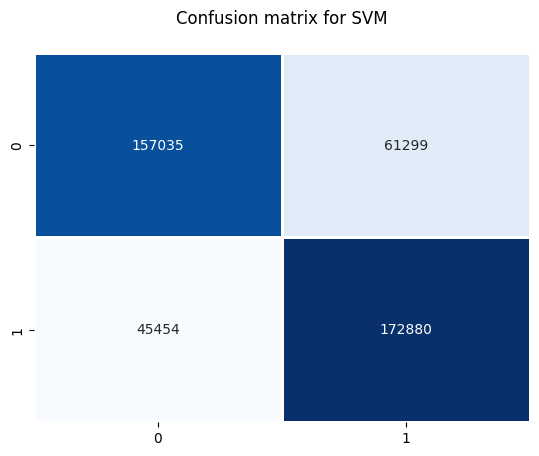

Classfication report for SVM
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75    218334
         1.0       0.74      0.79      0.76    218334

    accuracy                           0.76    436668
   macro avg       0.76      0.76      0.76    436668
weighted avg       0.76      0.76      0.76    436668

####################################
436668


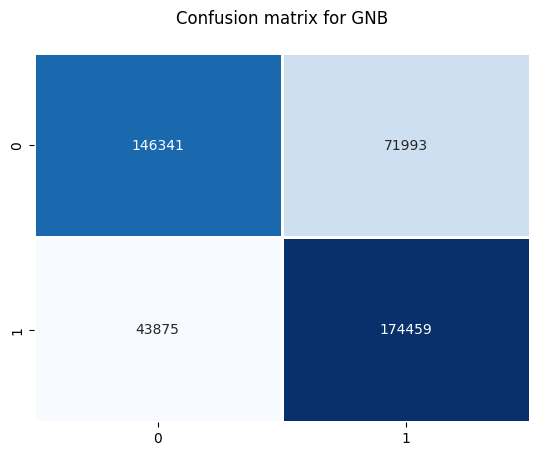

Classfication report for GNB
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72    218334
         1.0       0.71      0.80      0.75    218334

    accuracy                           0.73    436668
   macro avg       0.74      0.73      0.73    436668
weighted avg       0.74      0.73      0.73    436668

####################################
436668


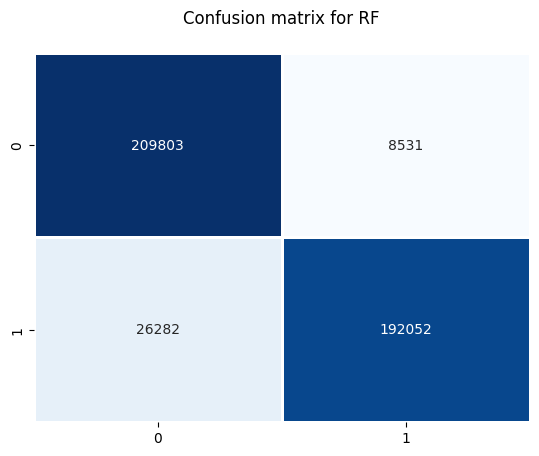

Classfication report for RF
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92    218334
         1.0       0.96      0.88      0.92    218334

    accuracy                           0.92    436668
   macro avg       0.92      0.92      0.92    436668
weighted avg       0.92      0.92      0.92    436668

####################################


In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as PipelineS


smote = SMOTE(sampling_strategy='auto', random_state= 42)

x_resample, y_resample = smote.fit_resample(x_s2, y_s2)

for name, m in models.items():
    pipeline = PipelineS([('scaler', MinMaxScaler()),
                         ('classifier', m)
                         
                       ])
    
   

   
    y_pred = cross_val_predict(pipeline,x_resample,y_resample,cv=kf)
    print(len(y_pred))
    
    

    
    confusionM = confusion_matrix(y_resample,y_pred)
    sns.heatmap(confusionM, annot= True, cmap= 'Blues', fmt= "d",cbar= False, linewidths= 1)
    plt.title (f"Confusion matrix for {name}\n")
    plt.show()
  

    print(f"Classfication report for {name}")
    print(classification_report(y_resample,y_pred))
    print("####################################")
    # add variance 